In [9]:
import pandas as pd
from scipy import spatial
import libpysal as ps
import numpy as np
from pointpats import PointPattern
from pointpats import PoissonPointProcess, PoissonClusterPointProcess, Window, poly_from_bbox, PointPattern
import libpysal as ps
from libpysal.cg import shapely_ext
%matplotlib inline
import matplotlib.pyplot as plt
import pointpats.quadrat_statistics as qs
from pointpats import PointPattern, as_window
from pointpats import PoissonPointProcess as csr
from pointpats.geometry import *
from pointpats.ripley import _prepare # very important to prepare data :)


In [10]:
def kinhom(coords_array):
    coordinates, support, distances, metric, hull, edge_correction = _prepare(
            coords_array, support=None,
        distances=None,
        metric="euclidean",
        hull=None,
        edge_correction=None,
        )

    hull = _prepare_hull(coords_array, hull = None)

    n = coordinates.shape[0]
    upper_tri_distances = spatial.distance.pdist(coordinates, metric='euclidean') # OK  DISTANCES 
    n_pairs_less_than_d = (upper_tri_distances < support.reshape(-1, 1)).sum(axis=1) # N PAIRS LESS THAN DISTANCES 
    lambda_1 = n / _area(hull) #INTENSITY 
    k_estimate = ((n_pairs_less_than_d * 2) / n) / lambda_1 # OK  ((N PAIRS LESS THAN DISTANCE * 2) / N POINTS )/ INTENSITY    #BRING UP THE POINT FROM BADDELEY THAT ITS SHOULD BE N-1\HULL AREAS (PP 204)
    uno_fratto_a = 1/ _area(hull)
    lambda_2 = (n * (n - 1)) / (_area(hull))**2
    k_inhom_estimate = ((n_pairs_less_than_d *2) / (lambda_2)) * uno_fratto_a
    return support, k_inhom_estimate

In [11]:
numatax = pd.read_csv('/Users/gocchini/numatax.csv')
numatay = pd.read_csv('/Users/gocchini/numatay.csv')
numatax = numatax['x'].tolist()
numatay = numatay['x'].tolist()
numata_array = np.array(list(zip(numatax, numatay)))

In [12]:
numata_res = kinhom(numata_array)

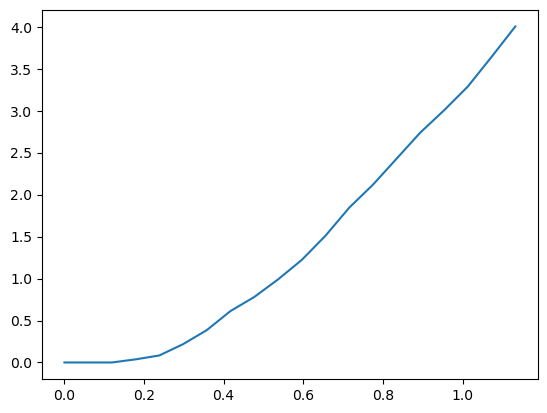

In [13]:
plt.plot(numata_res[0], numata_res[1])